# Thesis Code Part 2: EDA

In [1]:
import re
import os
import pandas as pd
import numpy as np
import pydicom as dcm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read report data
data = pd.read_csv('data/data_processed.csv')
data.head()

,Organization,Point of Care,Source System,Accession Number,Modality,Exam Code,Exam Description,CPT Code,Report Text,Is Stat,Patient Status,Patient Sex,Patient Age,comm,Downloaded,Caption,DCM Path
0,PDR1,RAD X-RAY PARN,EPIC,10021749129,XR,DCHE1,XR CHEST 1 VIEW AP,71010,INDICATION:\nXR CHEST 1 VIEW AP 1/12/2022 6:...,False,Inpatient,Male,59.0,0,True,No significant change in support device positi...,/mnt/sohn2022/UCSF_secure_cxr_data/raw/1002174...
1,MBXR1,RAD X-RAY MB,EPIC,10022160488,XR,DCHE1,XR CHEST 1 VIEW AP,71010,XR CHEST 1 VIEW AP 6/13/2022 2:18 PM\nHISTOR...,False,Outpatient,Male,31.0,0,True,Lungs clear. No pleural effusion or pneumothor...,/mnt/sohn2022/UCSF_secure_cxr_data/raw/1002216...
2,E01,RAD X-RAY PARN,EPIC,10022066026,XR,DCHE1,XR CHEST 1 VIEW AP,71010,XR CHEST 1 VIEW AP 5/7/2022 4:43 AM\nHISTORY...,False,Emergency,Female,60.0,0,True,"Left basilar hazy opacity, which may represent...",/mnt/sohn2022/UCSF_secure_cxr_data/raw/1002206...
3,PDR16,RAD X-RAY PARN,EPIC,10022846693,XR,DCHE1,XR CHEST 1 VIEW AP,71010,XR CHEST 1 VIEW AP 1/28/2023 1:50 AM\nHISTOR...,False,Inpatient,Male,32.0,0,True,Interval increase in size of moderate to large...,/mnt/sohn2022/UCSF_secure_cxr_data/raw/1002284...
4,PDR12,RAD X-RAY PARN,EPIC,10022056929,XR,DCHE1,XR CHEST 1 VIEW AP,71010,XR CHEST 1 VIEW AP 5/4/2022 12:11 PM\nHISTOR...,False,Inpatient,Male,76.0,0,True,Intubated patient with endotracheal tube tip 4...,/mnt/sohn2022/UCSF_secure_cxr_data/raw/1002205...


In [17]:
# example report text (no further communication)
sample = data[data['comm']==0].sample(1)
text = sample['Caption'].values[0]
text

'New enteric tube courses below the diaphragm and the field-of-view. Slightly decreased right basilar atelectasis. Remaining findings not significantly changed.'

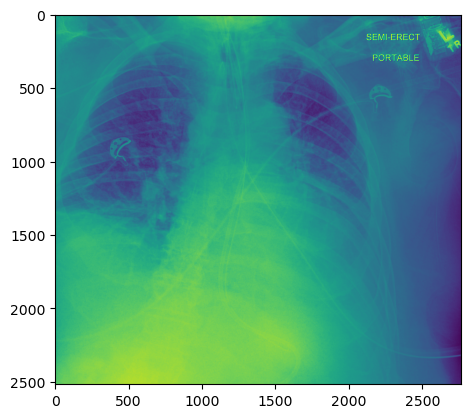

In [18]:
# example chest x-ray (no further communication)
image_path = sample['DCM Path'].values[0]
ds = dcm.dcmread(image_path)
plt.imshow(ds.pixel_array)
plt.savefig('no_comm.png')

In [20]:
# example report text (with communication)
sample = data[data['comm']==1].sample(1)
text = sample['Caption'].values[0]
text

'Interval removal of bilateral thoracotomy tubes with new moderate right pneumothorax measuring approximately 2 cm from the visceral to parietal pleura. No significant left pneumothorax. Increased mild patchy bibasilar airspace opacities likely reflecting atelectasis.\n//'

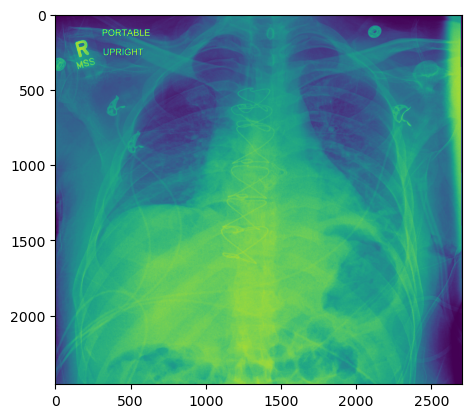

In [21]:
# example chest x-ray (with communication)
image_path = sample['DCM Path'].values[0]
ds = dcm.dcmread(image_path)
plt.imshow(ds.pixel_array)
plt.savefig('comm.png')

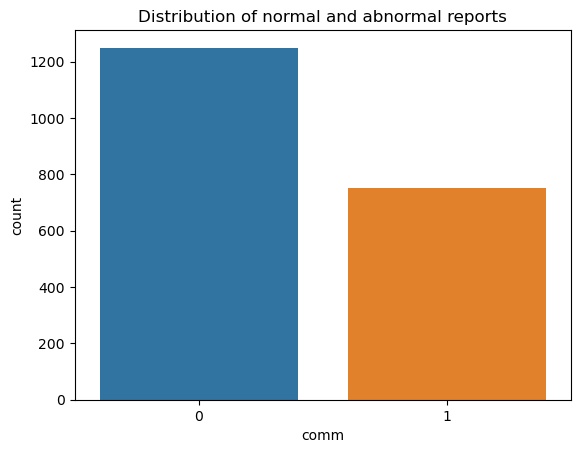

In [22]:
# Distribution of labels
ax = sns.countplot(x=data['comm'])
ax.set_title("Distribution of normal and abnormal reports")
plt.savefig('label_dist.png');

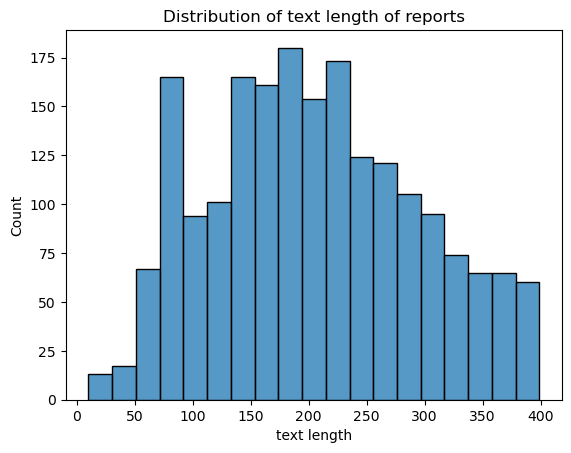

In [23]:
# Distribution of text length
data["text length"] = data["Caption"].str.len()
ax = sns.histplot(data=data,x='text length')
ax.set_title("Distribution of text length of reports")
plt.savefig('dist_text_len.png');

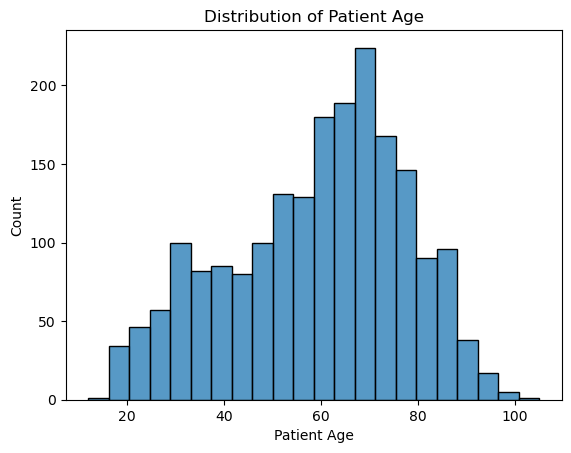

In [24]:
# Distribution of Age
ax = sns.histplot(data=data,x='Patient Age')
ax.set_title("Distribution of Patient Age")
plt.savefig('age_dist.png');